### Importing and structuring the data

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Set random seed for reproducibility
np.random.seed(0)

#set my path
local_path = '/Users/pegaheizad/Desktop/Ghosh_lab'
# Load the data from an Excel file
T1 = pd.read_excel(f'{local_path}/ML_combined_data_intensity_classified.xlsx')
T1.shape

# for index, column in enumerate(T1.columns):
#     print(f" {index}: {column}")



(785, 98)

In [54]:
# Define the columns for the different categories
# Metadata & OTHER COLUMNS TO EXCLUDE (python index): Cols 0-8, 64, 93-95
# Geometric: 9-33; 
# Zernike Moments: 34-63
# Intensity: 65-92
# experimenting with excluding radial distribution and texture columns:
#T2 = pd.concat([T1.iloc[:, 9:63]], axis=1)
T2 = pd.concat([T1.iloc[:, 9:63]], axis=1)

# Convert the table to a NumPy array
T = T2.to_numpy()

### Setting the parameters for the ML

In [55]:
# Define the number of samples for each class
M = 385
N = 400

# Create label vector: 1 for Class 1, 0 for Class 2
t = np.concatenate([np.ones(M), np.zeros(N)])

# Explanatory variables: Zernike Moments
X = T[:, 34:63]

# Ensure the dataset size matches the labels, optional check
assert X.shape[0] == len(t), 'Mismatch between data and label lengths.'

# Define the number of folds for cross-validation
kfold = 10
kf = KFold(n_splits=kfold, shuffle=True, random_state=0)

# Define the number of nodes in the hidden layer
nNodes = 40

# Initialize confusion matrix and lists for predictions
totcon = np.zeros((2, 2))  
totpred = np.array([])     
totytest = np.array([])    
models = []
acc = []


### Training the ML

In [56]:
# Train-test loop
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = t[train_index], t[test_index]

    # Convert labels to categorical (for binary classification)
    ytrain_cat = to_categorical(ytrain, 2)
    ytest_cat = to_categorical(ytest, 2)

    # Build the neural network model
    model = Sequential()
    model.add(Dense(nNodes, input_shape=(X.shape[1],), activation='relu'))
    model.add(Dense(2, activation='softmax'))  # 2 output classes

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model (90% train, 10% validation, no test ratio)
    model.fit(xtrain, ytrain_cat, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Store the trained model
    models.append(model)

    # Make predictions on the test set
    pred = model.predict(xtest)
    pred_labels = np.argmax(pred, axis=1)

    # Calculate confusion matrix
    con = confusion_matrix(ytest, pred_labels)
    totcon += con

    # Calculate accuracy for this fold
    acc.append(accuracy_score(ytest, pred_labels) * 100)

    # Store predictions and true labels for confusion matrix plotting
    totpred = np.concatenate([totpred, pred_labels])
    totytest = np.concatenate([totytest, ytest])

# Print the average accuracy over all folds
print(f'Average accuracy over {kfold} folds: {np.mean(acc)}%')

# Optional: save the models and accuracy data
# np.save(f'{local_path}/models.npy', models)
# np.savetxt(f'{local_path}/accuracy.csv', acc, delimiter=',')

/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Average accuracy over 10 folds: 54.00194741966893%


# Testing optimizations

In [183]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Set random seed for reproducibility
np.random.seed(0)

# Set your local path
local_path = '/Users/pegaheizad/Desktop/Ghosh_lab/data_files_2'

# Load the data from an Excel file
T1 = pd.read_excel(f'{local_path}/ML_data_intensity_classified.xlsx')


T2 = pd.concat([T1.iloc[:, 9:63]], axis=1)

# Convert the table to a NumPy array
T = T2.to_numpy()

# Define the number of samples for each class
M = 1921
N = 1921

# Create label vector: 1 for Class 1, 0 for Class 2
t = np.concatenate([np.ones(M), np.zeros(N)])

# Explanatory variables: Zernike Moments (assumed to be columns 19-48)
X = T[:, 9:63]

# Ensure the dataset size matches the labels
assert X.shape[0] == len(t), 'Mismatch between data and label lengths.'

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the number of folds for cross-validation
kfold = 10
kf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=0)

# Initialize confusion matrix and lists for predictions
totcon = np.zeros((2, 2))  
totpred = np.array([])     
totytest = np.array([])    
models = []
acc = []

# Early stopping with increased patience
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train-test loop
for train_index, test_index in kf.split(X, t):
    # Split the data into training and test sets
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = t[train_index], t[test_index]

    # Convert labels to categorical (for binary classification)
    ytrain_cat = to_categorical(ytrain, 2)
    ytest_cat = to_categorical(ytest, 2)

    # Build the enhanced neural network model
    model = Sequential()
    model.add(Dense(128, input_shape=(X.shape[1],), activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.3))  # Reduced dropout rate
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.3))  # Reduced dropout rate
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.3))  # Reduced dropout rate
    model.add(Dense(2, activation='softmax'))  # 2 output classes for binary classification

    # Compile the model with a lower learning rate
    optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for finer training
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model (with early stopping)
    model.fit(xtrain, ytrain_cat, epochs=100, batch_size=32, validation_split=0.1, verbose=0, callbacks=[early_stopping])

    # Store the trained model
    models.append(model)

    # Make predictions on the test set
    pred = model.predict(xtest)
    pred_labels = np.argmax(pred, axis=1)

    # Calculate confusion matrix
    con = confusion_matrix(ytest, pred_labels)
    totcon += con

    # Calculate accuracy for this fold
    acc.append(accuracy_score(ytest, pred_labels) * 100)

    # Store predictions and true labels for confusion matrix plotting
    totpred = np.concatenate([totpred, pred_labels])
    totytest = np.concatenate([totytest, ytest])

# Print the average accuracy over all folds
print(f'Average accuracy over {kfold} folds: {np.mean(acc)}%')

# Optional: save the models and accuracy data
# np.save(f'{local_path}/models.npy', models)
# np.savetxt(f'{local_path}/accuracy.csv', acc, delimiter=',')


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


/opt/anaconda3/envs/uqbio2024_py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
Average accuracy over 10 folds: 51.71604437229437%


### Visualizing the confusion matrix

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step


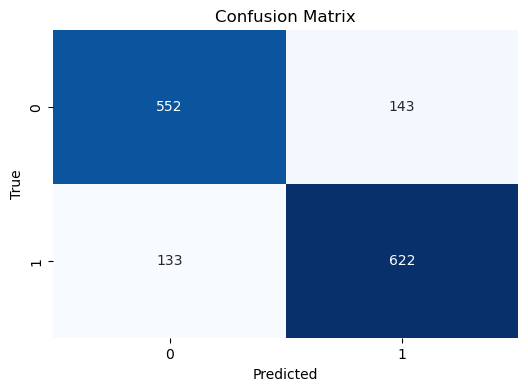

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After generating predictions from the model
y_pred = model.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(ytest, y_pred_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
